# kmedoids
Investigate the clusters of the clustering algorithm

In [1]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.

from classification.clustering.clustering_algorithms import kmedoids_clustering
from classification.clustering.config_clustering import *
from classification.database_communication.DatabaseCommunication import DatabaseCommunication
from plotting.plot_networks import *
from plotting.plotting_classification import plot_percentage_of_clusters, \
    plot_stacked_distribution_of_clusters_per_regio_5, plot_bar_distribution_of_clusters_per_regio_5

warnings.filterwarnings('ignore')

Import the data and cluster

In [2]:
dc = DatabaseCommunication()
df_parameters_of_grids = dc.municipal_register_with_clustering_parameters_for_classification_version()

Database connection is constructed. 


In [3]:
df_parameters_of_grids, representative_networks = kmedoids_clustering(df_parameters_of_grids=df_parameters_of_grids,
                                                                      list_of_clustering_parameters=LIST_OF_CLUSTERING_PARAMETERS,
                                                                      n_clusters=N_CLUSTERS_KMEDOID)

plot percentage of clusters

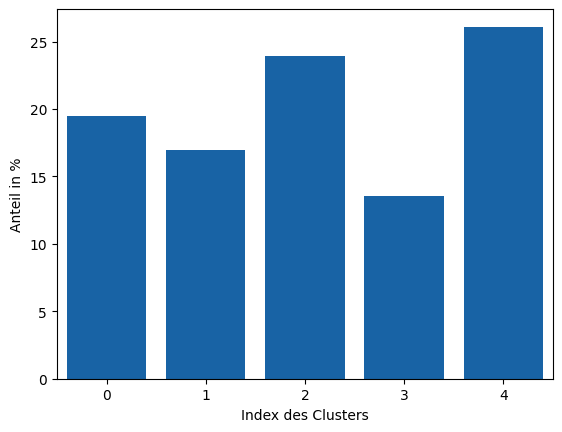

In [4]:
plot_percentage_of_clusters(df_grid_parameters=df_parameters_of_grids)

stacked bar plot of distribution of clusters over regio 5

In [ ]:
plot_stacked_distribution_of_clusters_per_regio_5(df_grid_parameters=df_parameters_of_grids)

bar plot of clusters in regio 5 classes side by side

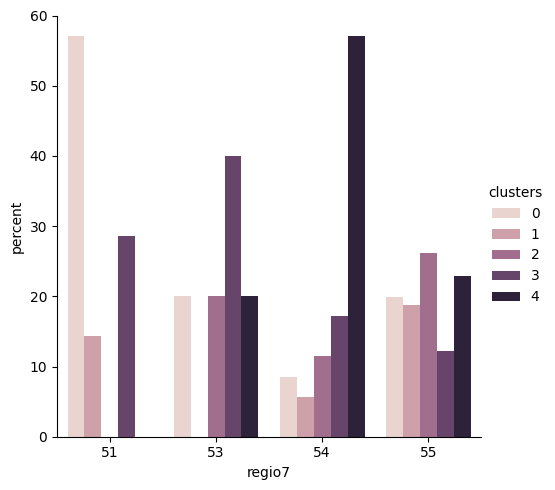

In [6]:
plot_bar_distribution_of_clusters_per_regio_5(df_grid_parameters=df_parameters_of_grids)

plot clusters over cluster parameters

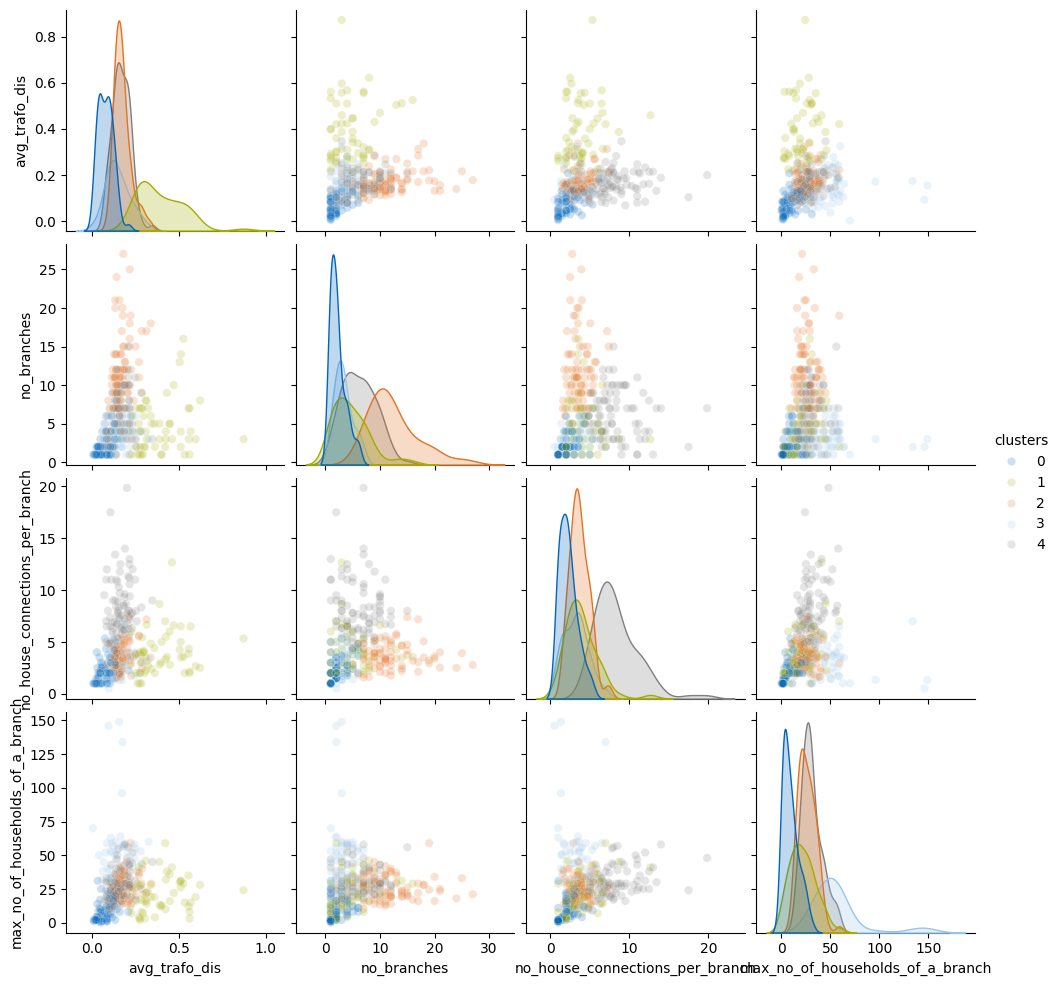

In [7]:
df_pairplot = df_parameters_of_grids[[param1, param2, param3, param4, 'clusters']]
sns.pairplot(data=df_pairplot, hue='clusters', palette=TUMPalette, kind='scatter', plot_kws={'alpha': 0.2})
plt.savefig('pairplot.pdf', dpi=600, bbox_inches='tight')